In [48]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [3]:
# load and print data
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# load and print data
players = pd.read_csv("players_22.csv")
players.tail()

C:\Users\CKitc\AppData\Local\Temp\ipykernel_22460\457996350.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [13]:
# get features
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [15]:
# drop nan values from features column
players = players.dropna(subset = features)

In [19]:
# copy the dataframe into a new one, selecting only relevant features
data = players[features].copy()

# print the new data
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [20]:
# rescake the data
data = (data - data.min())/(data.max() - data.min())*9 + 1
data

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.012876,1.002830,3.000000
19235,1.000000,2.956522,1.000000,1.004686,2.000000
19236,1.000000,2.173913,1.000000,1.004222,2.666667
19237,1.000000,3.152174,1.000000,1.004686,2.000000


In [21]:
def random_centroids(data, k):
    """Choose random centroids

    Args:
        data (df): data
        k (int): number of centroids

    Returns:
        df: centroid data
    """
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)


In [32]:
# generate 3 random centroids
k = 3
centroids = random_centroids(data, k)

In [27]:
def get_labels(data, centroids):
    """Find centroid that each data point is closest to

    Args:
        data (df): data
        centroids (df): centroid data

    Returns:
        series: centroid that each data point is closes to
    """
    distances = centroids.apply(lambda x : np.sqrt(((data - x)**2).sum(axis = 1))) # distances of each point from centroid
    return distances.idxmin(axis = 1) # point that is the min distance from that centroid

In [38]:
# find centroid closest to each point
labels = get_labels(data, centroids)
print(labels)

0        1
1        1
2        1
3        1
4        1
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64


In [30]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

In [33]:
# update centroid position
new_centroids(data, labels, k)

,0,1,2
overall,3.798343,5.861003,3.309207
potential,4.592769,6.028388,5.614682
wage_eur,1.050343,1.388360,1.034385
value_eur,1.034967,1.228573,1.026492
age,3.421479,4.584784,2.487452


In [54]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:, 0], y = data_2d[:, 1], c = labels)
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1])
    plt.show()

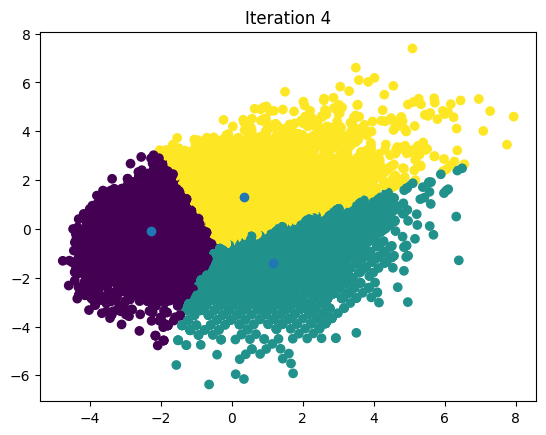

In [56]:
max_iterations = 5
centroid_count = 3 # number of clusters

centroids = random_centroids(data, centroid_count) # get initial centroids
old_centroids = pd.DataFrame() # to test if steady state found
iteration = 1

# run iterations
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1